## Prediction on Advertising Sales

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Load the dataset

In [2]:
import pandas as pd
df= pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.shape

(200, 4)

In [5]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Descriptive Analysis

Datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


## Feature Engineering
    1. Check for missing values and duplicated rows and  handle them if there are any
    2. Check for outliers/skeweness in dataset and handle outliers in case of skewed data
    3. Scale the continuous data using standard scaler
    4. Separate X and Y features
    5. Split the data into training set and testing set

-----------------------------------------------------------
1. Check for missing values and duplicated rows and  handle them if there are any

In [8]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.duplicated().sum()

0

------------------------------------------------
2. Check for outliers/skeweness in dataset and handle outliers in case of skewed data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

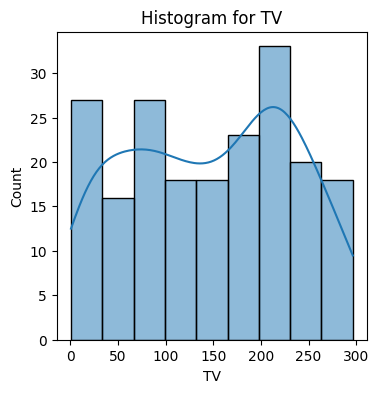

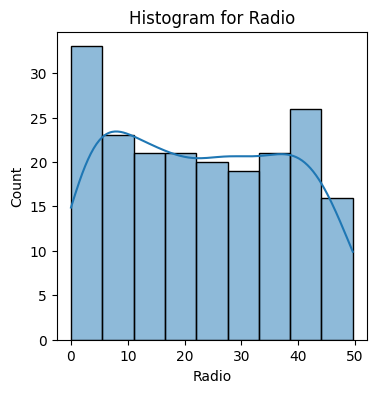

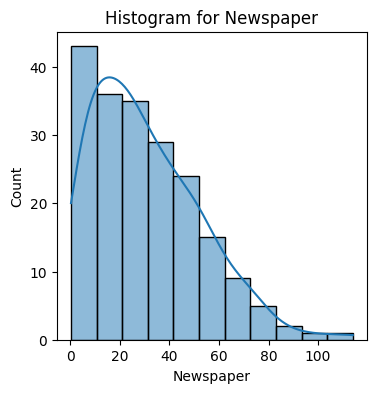

In [11]:
con = ['TV','Radio','Newspaper']
for i in con:
    plt.figure(figsize=(4,4))
    sns.histplot(df,x=i,kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

we can observe skeweness in the Newspaper data. Lets handle it using log transform

In [12]:
# positive large number dentoes that the data is skewed
df['Newspaper'].skew()

0.8947204074986175

In [13]:
df['Newspaper'] = round(np.log10(df['Newspaper']),1)

In [14]:
# small or negative number dentoes that the data is skewed
df['Newspaper'].skew()

-1.1407667692462904

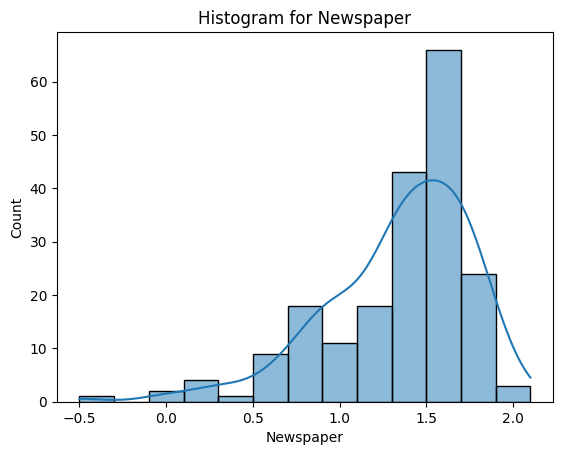

In [15]:
sns.histplot(df,x='Newspaper',kde=True)
plt.title(f'Histogram for {i}')
plt.show()

---------------------------------------------------
3. Scale the continuous data using standard scaler

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
pre = Pipeline(steps=[('scaler',StandardScaler())]).set_output(transform='pandas')

In [18]:
pre

Pipeline(steps=[('scaler', StandardScaler())])

In [19]:
df_pre = pre.fit_transform(df)
df_pre.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.091521,1.322319
1,-1.197376,1.082808,0.854492,-0.897515
2,-1.516155,1.528463,1.091521,-0.593948
3,0.052050,1.217855,1.091521,0.259834
4,0.394182,-0.841614,1.091521,0.525455


-----------------------------------------------
4. Separate X and Y features

In [20]:
X = df.drop(columns='Sales')
Y =df[['Sales']]

In [21]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,1.8
1,44.5,39.3,1.7
2,17.2,45.9,1.8
3,151.5,41.3,1.8
4,180.8,10.8,1.8


In [22]:
Y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


------------------------------------------------------------
5. Split the data into training set and testing set

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25,random_state=21)

In [24]:
xtrain.shape

(150, 3)

In [25]:
xtest.shape

(50, 3)

In [26]:
ytrain.shape

(150, 1)

In [27]:
ytest.shape

(50, 1)

## Build the model

Performing Algorithm evaluation to choose the best models which can give accurate predictions

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [29]:
dct = {
    'Linear' : LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest' : RandomForestRegressor(),
    'GradientBoosting' : GradientBoostingRegressor(),
    'XGBoost' : XGBRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVR' : SVR()
}

In [30]:
train_mse = []
train_r2 = []
test_mse = []
test_r2 = []
train_cv = []

for name,model in dct.items():
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict the results
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Calculate MSE and R2 score
    mse_train = mean_squared_error(ytrain,ypred_train) 
    mse_test = mean_squared_error(ytest,ypred_test)
    r2_train = r2_score(ytrain,ypred_train)
    r2_test =r2_score(ytest,ypred_test)
    # Calculate cross validation score
    scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error')
    score = scores.mean()

    # Append the results list
    train_mse.append(mse_train)
    test_mse.append(mse_test)
    train_r2.append(r2_train)
    test_r2.append(r2_test)
    train_cv.append(score)

    # print the results
    print(f'Scores for {name}')
    print("Training Scores")
    print(f'MSE:{train_mse}')
    print(f'R2:{train_r2}')
    print("Testing Scores")
    print(f'MSE:{test_mse}')
    print(f'R2:{test_r2}')
    print(f'CV:{train_cv}')
    print("===============================")



Scores for Linear
Training Scores
MSE:[3.024305842053575]
R2:[0.8856225446863943]
Testing Scores
MSE:[1.7932781722045343]
R2:[0.9435739690551218]
CV:[-3.10333700064874]
Scores for DecisionTree
Training Scores
MSE:[3.024305842053575, 0.0]
R2:[0.8856225446863943, 1.0]
Testing Scores
MSE:[1.7932781722045343, 2.6044]
R2:[0.9435739690551218, 0.9180517795450647]
CV:[-3.10333700064874, -2.7685333333333326]
Scores for RandomForest
Training Scores
MSE:[3.024305842053575, 0.0, 0.23085018666666457]
R2:[0.8856225446863943, 1.0, 0.9912693826985187]
Testing Scores
MSE:[1.7932781722045343, 2.6044, 1.6742769599999958]
R2:[0.9435739690551218, 0.9180517795450647, 0.9473183775838202]
CV:[-3.10333700064874, -2.7685333333333326, -1.6011043733333352]
Scores for GradientBoosting
Training Scores
MSE:[3.024305842053575, 0.0, 0.23085018666666457, 0.19906597247576466]
R2:[0.8856225446863943, 1.0, 0.9912693826985187, 0.9924714428498919]
Testing Scores
MSE:[1.7932781722045343, 2.6044, 1.6742769599999958, 1.8452671

In [31]:
res = {'Name':list(dct.keys()),
       'MSE Training Scores':train_mse,
       'MSE Testing Scores':test_mse,
       'R2 Training Scores':train_r2,
       'R2 Testing Scores':test_r2,
       'CV Training Scores':train_cv}

In [32]:
df_res = pd.DataFrame(res)
df_res.sort_values('CV Training Scores',ascending=False)

,Name,MSE Training Scores,MSE Testing Scores,R2 Training Scores,R2 Testing Scores,CV Training Scores
2,RandomForest,0.230850,1.674277,0.991269,0.947318,-1.601104
4,XGBoost,0.000002,1.734534,1.000000,0.945422,-1.744616
3,GradientBoosting,0.199066,1.845267,0.992471,0.941938,-1.839461
5,KNN,1.108309,1.775784,0.958084,0.944124,-2.066459
1,DecisionTree,0.000000,2.604400,1.000000,0.918052,-2.768533
0,Linear,3.024306,1.793278,0.885623,0.943574,-3.103337
6,SVR,3.562114,4.473619,0.865283,0.859236,-4.292786


#### Lets consider Random Forest Regressor as its giving good results

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
params = {'n_estimators':[50,100,200,300],
          'max_depth':[5,6,7,8],
          'criterion':['squared_error','absolute_error']}

In [35]:
rfr = RandomForestRegressor()
rscv = RandomizedSearchCV(rfr,params,cv=5,scoring='neg_mean_squared_error')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 6, 7, 8],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='neg_mean_squared_error')

In [36]:
rscv.best_params_

{'n_estimators': 300, 'max_depth': 8, 'criterion': 'absolute_error'}

In [37]:
best_rfr = rscv.best_estimator_
best_rfr

RandomForestRegressor(criterion='absolute_error', max_depth=8, n_estimators=300)

In [38]:
best_rfr.score(xtrain,ytrain)

0.9886552675806568

In [39]:
best_rfr.score(xtest,ytest)

0.9440011192590841

## Evaluate the models : Random Forest

In [40]:
def eval_model(model,xtrain,ytrain):
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict the scores
    ypred_test = model.predict(xtest)
    # Calculate MSE,RMSE,MAE,R2 scores
    mse = mean_squared_error(ytest,ypred_test)
    rmse = mse**(1/2)
    mae = mean_absolute_error(ytest,ypred_test)
    r2 = round(r2_score(ytest,ypred_test),1)*100
    return mse,rmse,mae,r2

Random Forest Evaluation Metrics

In [41]:
(MSE,RMSE,MAE,r2) = eval_model(best_rfr,xtrain,ytrain)
print(f'Evaluation Metrics: \nMSE: {MSE}\nRMSE:{RMSE}\nMAE:{MAE}\nR2:{r2}')

Evaluation Metrics: 
MSE: 1.6867399311111273
RMSE:1.2987455220754862
MAE:1.0345133333333405
R2:90.0


#### Random Forest is providing best test score as compared to other models. Considering Random Forest for final prediction
--------------------------------------------------------------------------------------

## Model Prediction

In [42]:
ypred_test = best_rfr.predict(xtest)
ypred_test[:5]

array([11.88066667, 16.58416667, 22.92866667, 18.97216667, 17.20383333])

In [43]:
ytest.head()

,Sales
144,12.3
9,15.6
17,24.4
20,18.0
45,16.1


In [44]:
df_final = xtest
df_final['Predicted_Sales'] = ypred_test
df_final

,TV,Radio,Newspaper,Predicted_Sales
144,96.2,14.8,1.6,11.880667
9,199.8,2.6,1.3,16.584167
17,281.4,39.6,1.7,22.928667
20,218.4,27.7,1.7,18.972167
45,175.1,22.5,1.5,17.203833
6,57.5,32.8,1.4,10.501000
52,216.4,41.7,1.6,21.646167
91,28.6,1.5,1.5,7.624333
129,59.6,12.0,1.6,9.523167
183,287.6,43.0,1.9,25.273667


Save the results to dataframe

In [45]:
df_final.to_csv('Predicted Sales.csv',index=False)